In [1]:
# Sample API
import flowx
import simulation
flowx.__version__

'0.1.dev'

In [2]:
# Define grid parameters
nx, ny = 100, 50
xmin, xmax = -3.0, 7.0
ymin, ymax = -2.5, 2.5

# Define cell-centered variable names
center_vars = ['pres', 'divv']
face_vars   = ['velc', 'hvar']

# Define boundary conditions for variable pressure and velocity [left, right, bottom, top]
bc_type_pres = {'pres': ['neumann', 'neumann', 'neumann', 'neumann']}
bc_val_pres  = {'pres': [0.0, 0.0, 0.0, 0.0]}

bc_type_u = {'velc': ['dirichlet', 'outflow', 'dirichlet', 'dirichlet']}
bc_val_u  = {'velc': [1.0, 0.0, 0.0, 0.0]}

bc_type_v = {'velc': ['dirichlet', 'dirichlet', 'dirichlet', 'dirichlet']}
bc_val_v  = {'velc': [0.0, 0.0, 0.0, 0.0]}


# Create the grid and data
gridc = flowx.serial.Grid('cell-centered', center_vars,
                    nx, ny, xmin, xmax, ymin, ymax,
                    user_bc_type=bc_type_pres, user_bc_val=bc_val_pres)

gridx = flowx.serial.Grid('x-face', face_vars,
                    nx, ny, xmin, xmax, ymin, ymax,
                    user_bc_type=bc_type_u, user_bc_val=bc_val_u)

gridy = flowx.serial.Grid('y-face', face_vars,
                    nx, ny, xmin, xmax, ymin, ymax,
                    user_bc_type=bc_type_v, user_bc_val=bc_val_v)

scalars = flowx.serial.Scalars(tmax=10.0, dt=0.01, Re=100.0)

In [3]:
simulation.set_initial_velocity(gridc, gridx, gridy, 'velc', 'pres')

------------ Time = 0.0 ---------------
Number of poisson iterations    : 0
Final poisson residual : 0.0
Max, Min, U   : 1.0, -1.0
Max, Min, V   : 0.0, 0.0
Max, Min, P   : 0.0, 0.0
Max, Min, DIV : 0.0, 0.0




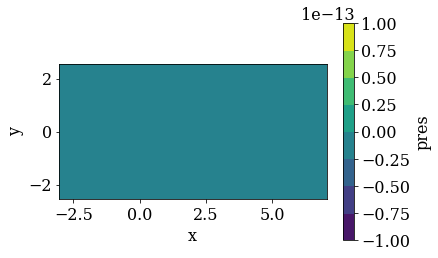

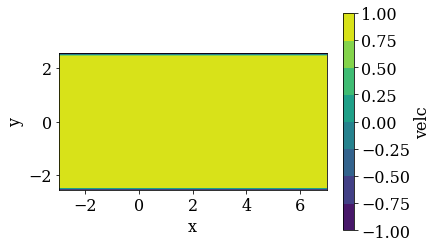

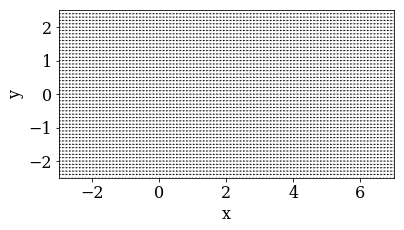

------------ Time = 0.01 ---------------
Number of poisson iterations    : 180
Final poisson residual : 9.130498700557159e-10
Max, Min, U   : 1.0059799044059887, -1.0
Max, Min, V   : 0.014974858349217466, -0.014974858349217466
Max, Min, P   : 1.0594714190432812, -1.0594714190432815
Max, Min, DIV : 1.597027199368292e-08, -1.5970277045319653e-08


------------ Time = 0.02 ---------------
Number of poisson iterations    : 213
Final poisson residual : 8.666085226348617e-10
Max, Min, U   : 1.0098433369559585, -1.0
Max, Min, V   : 0.02477885355253246, -0.02477885355253246
Max, Min, P   : 0.6839953247223083, -0.6705652810001751
Max, Min, DIV : 1.5703486020215984e-08, -1.5253676783049536e-08


------------ Time = 0.03 ---------------
Number of poisson iterations    : 198
Final poisson residual : 9.609658419086677e-10
Max, Min, U   : 1.013592033472834, -1.0
Max, Min, V   : 0.03410833990000252, -0.03410833990000252
Max, Min, P   : 0.6777143765834722, -0.6545089339881273
Max, Min, DIV : 1.9460001

------------ Time = 0.26000000000000006 ---------------
Number of poisson iterations    : 201
Final poisson residual : 9.339683398346955e-10
Max, Min, U   : 1.0549818206624928, -1.0
Max, Min, V   : 0.1330569975078277, -0.1330569975078277
Max, Min, P   : 0.5461278599136153, -0.3112294523184171
Max, Min, DIV : 1.636203277033399e-08, -2.069257103338995e-08


------------ Time = 0.2700000000000001 ---------------
Number of poisson iterations    : 200
Final poisson residual : 9.965240303114583e-10
Max, Min, U   : 1.0566703910728732, -1.0
Max, Min, V   : 0.13501292190211636, -0.13501292190211636
Max, Min, P   : 0.5426321073940301, -0.3026452456606243
Max, Min, DIV : 2.276806401746434e-08, -2.1764995722373115e-08


------------ Time = 0.2800000000000001 ---------------
Number of poisson iterations    : 200
Final poisson residual : 9.566754989136654e-10
Max, Min, U   : 1.058320754159459, -1.0
Max, Min, V   : 0.1367039989196801, -0.1367039989196801
Max, Min, P   : 0.5392619320087564, -0.2950526

------------ Time = 0.5400000000000003 ---------------
Number of poisson iterations    : 186
Final poisson residual : 9.35943545720407e-10
Max, Min, U   : 1.088944605881362, -1.0
Max, Min, V   : 0.1244135373703981, -0.1244135373703981
Max, Min, P   : 0.4827306866083992, -0.1899682920649296
Max, Min, DIV : 2.0461461358589617e-08, -1.7891338965903003e-08


------------ Time = 0.5500000000000003 ---------------
Number of poisson iterations    : 185
Final poisson residual : 9.877911433289072e-10
Max, Min, U   : 1.0898393123769266, -1.0
Max, Min, V   : 0.12306412798046479, -0.12306412798046479
Max, Min, P   : 0.4813732348295942, -0.18821762215844975
Max, Min, DIV : 2.1256922264067946e-08, -1.7807995796731424e-08


------------ Time = 0.5600000000000003 ---------------
Number of poisson iterations    : 185
Final poisson residual : 9.371154736737375e-10
Max, Min, U   : 1.0906982481559269, -1.0
Max, Min, V   : 0.12173301465763356, -0.12173301465763356
Max, Min, P   : 0.4800554714207579, -0.186

------------ Time = 0.7800000000000005 ---------------
Number of poisson iterations    : 181
Final poisson residual : 8.863102107088721e-10
Max, Min, U   : 1.1025663310317961, -1.0
Max, Min, V   : 0.11666642540456376, -0.11666642540667878
Max, Min, P   : 0.4585960176802342, -0.16070404102435645
Max, Min, DIV : 1.3686137882717997e-08, -1.7174364447952728e-08


------------ Time = 0.7900000000000005 ---------------
Number of poisson iterations    : 181
Final poisson residual : 8.923064927091961e-10
Max, Min, U   : 1.1033826088245755, -1.0
Max, Min, V   : 0.1165803306143048, -0.11658033061321588
Max, Min, P   : 0.45787921985142926, -0.15958058364981473
Max, Min, DIV : 1.3050371026890328e-08, -1.7001230343677287e-08


------------ Time = 0.8000000000000005 ---------------
Number of poisson iterations    : 181
Final poisson residual : 9.020812339727272e-10
Max, Min, U   : 1.1041702864085996, -1.0
Max, Min, V   : 0.11649215831912724, -0.11649215832158526
Max, Min, P   : 0.4571796627154992, -

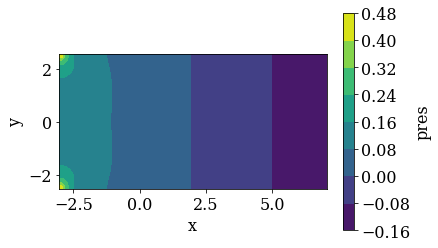

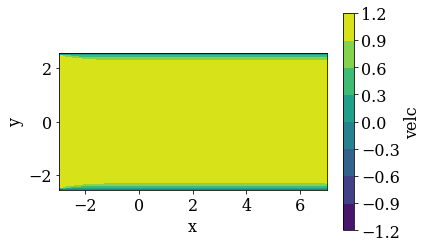

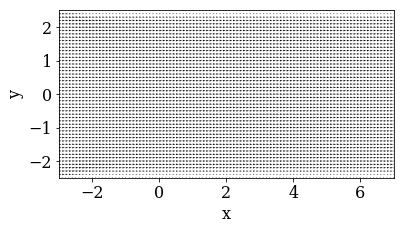

------------ Time = 1.0100000000000007 ---------------
Number of poisson iterations    : 179
Final poisson residual : 9.050175324802083e-10
Max, Min, U   : 1.1173291277360524, -1.0
Max, Min, V   : 0.11602809546917091, -0.11602809546879973
Max, Min, P   : 0.44576627860581913, -0.13546817832891905
Max, Min, DIV : 1.9005120879822535e-08, -1.4277877855711774e-08


------------ Time = 1.0200000000000007 ---------------
Number of poisson iterations    : 179
Final poisson residual : 8.425134806521384e-10
Max, Min, U   : 1.117808956716201, -1.0
Max, Min, V   : 0.11609364785030343, -0.11609364784754106
Max, Min, P   : 0.44535092922851893, -0.1344478756709316
Max, Min, DIV : 1.7551468681209492e-08, -1.5124286059653436e-08


------------ Time = 1.0300000000000007 ---------------
Number of poisson iterations    : 179
Final poisson residual : 7.763574867122321e-10
Max, Min, U   : 1.118262680779231, -1.0
Max, Min, V   : 0.11616479476046286, -0.11616479476080152
Max, Min, P   : 0.44494505743866314, -

------------ Time = 1.290000000000001 ---------------
Number of poisson iterations    : 174
Final poisson residual : 8.473039214541013e-10
Max, Min, U   : 1.1253537805599338, -1.0
Max, Min, V   : 0.11823229973401851, -0.11823229974072255
Max, Min, P   : 0.4370125038967813, -0.12333504918345597
Max, Min, DIV : 1.4856288727427974e-08, -1.8370451132510013e-08


------------ Time = 1.300000000000001 ---------------
Number of poisson iterations    : 174
Final poisson residual : 8.185509481014396e-10
Max, Min, U   : 1.125476622347283, -1.0
Max, Min, V   : 0.11827846725259424, -0.11827846724243134
Max, Min, P   : 0.4367856240671297, -0.12291894647276172
Max, Min, DIV : 1.3788691931413029e-08, -1.591672722659268e-08


------------ Time = 1.310000000000001 ---------------
Number of poisson iterations    : 174
Final poisson residual : 7.845395533645798e-10
Max, Min, U   : 1.1255851540281503, -1.0
Max, Min, V   : 0.11832131277661581, -0.1183213127828502
Max, Min, P   : 0.43656320036889784, -0.122

------------ Time = 1.5300000000000011 ---------------
Number of poisson iterations    : 170
Final poisson residual : 9.089820596492222e-10
Max, Min, U   : 1.1258561085317236, -1.0
Max, Min, V   : 0.11873611313128954, -0.11873611312364718
Max, Min, P   : 0.43261134651317623, -0.11370927322826069
Max, Min, DIV : 1.447332735783494e-08, -1.7646158098974518e-08


------------ Time = 1.5400000000000011 ---------------
Number of poisson iterations    : 167
Final poisson residual : 9.848132389695877e-10
Max, Min, U   : 1.1258302071185406, -1.0
Max, Min, V   : 0.1187455121091975, -0.11874551210829205
Max, Min, P   : 0.4324677403876833, -0.11332901292743472
Max, Min, DIV : 1.3803975530452157e-08, -1.974852833347418e-08


------------ Time = 1.5500000000000012 ---------------
Number of poisson iterations    : 166
Final poisson residual : 9.364489830142598e-10
Max, Min, U   : 1.1260172828576054, -1.0
Max, Min, V   : 0.11875505568794313, -0.1187550556947366
Max, Min, P   : 0.4323266671951896, -0.1

------------ Time = 1.7700000000000014 ---------------
Number of poisson iterations    : 170
Final poisson residual : 8.737058264071502e-10
Max, Min, U   : 1.129572572031744, -1.0
Max, Min, V   : 0.11904155092014154, -0.11904155091577852
Max, Min, P   : 0.42979968258193113, -0.10525682112288073
Max, Min, DIV : 1.4753752695245703e-08, -1.7445423381281036e-08


------------ Time = 1.7800000000000014 ---------------
Number of poisson iterations    : 170
Final poisson residual : 8.675684902200817e-10
Max, Min, U   : 1.1296845238601483, -1.0
Max, Min, V   : 0.11905661263148261, -0.11905661263400748
Max, Min, P   : 0.429707220422481, -0.1049406601351818
Max, Min, DIV : 1.4733395776892009e-08, -1.725966528856246e-08


------------ Time = 1.7900000000000014 ---------------
Number of poisson iterations    : 170
Final poisson residual : 8.537405597984761e-10
Max, Min, U   : 1.1297881178657816, -1.0
Max, Min, V   : 0.1190715929242803, -0.11907159291673637
Max, Min, P   : 0.42961641539682427, -0.1

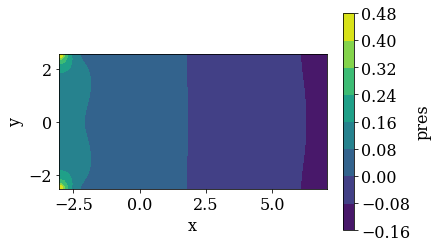

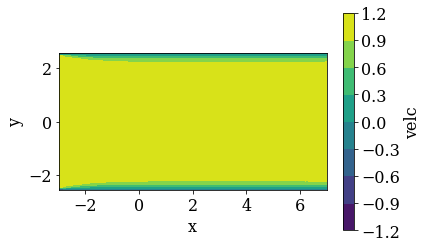

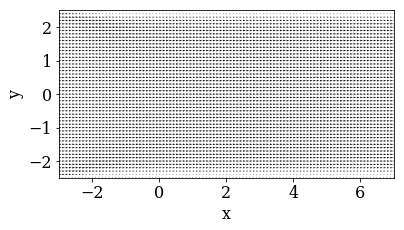

------------ Time = 2.010000000000001 ---------------
Number of poisson iterations    : 168
Final poisson residual : 8.948143824354883e-10
Max, Min, U   : 1.1308684981669093, -1.0
Max, Min, V   : 0.11933910675577371, -0.11933910676060172
Max, Min, P   : 0.42798022578054074, -0.09859909704700391
Max, Min, DIV : 1.470049312835009e-08, -1.4853962287605937e-08


------------ Time = 2.020000000000001 ---------------
Number of poisson iterations    : 167
Final poisson residual : 9.89719976498078e-10
Max, Min, U   : 1.1308952458365218, -1.0
Max, Min, V   : 0.11934788465747635, -0.11934788466431936
Max, Min, P   : 0.4279200248941718, -0.0983631874823199
Max, Min, DIV : 2.0522014032575697e-08, -1.7836166710250012e-08


------------ Time = 2.0300000000000007 ---------------
Number of poisson iterations    : 167
Final poisson residual : 9.673028858477252e-10
Max, Min, U   : 1.1309218656310525, -1.0
Max, Min, V   : 0.11935641416263017, -0.11935641416566946
Max, Min, P   : 0.4278608886779311, -0.09

------------ Time = 2.239999999999996 ---------------
Number of poisson iterations    : 162
Final poisson residual : 8.839592275893388e-10
Max, Min, U   : 1.1315058002677147, -1.0
Max, Min, V   : 0.11949978992167061, -0.11949978992655581
Max, Min, P   : 0.42683710091759225, -0.09388151106671133
Max, Min, DIV : 1.3695121894169437e-08, -1.598848362299038e-08


------------ Time = 2.249999999999996 ---------------
Number of poisson iterations    : 161
Final poisson residual : 9.978207128170937e-10
Max, Min, U   : 1.131532182117595, -1.0
Max, Min, V   : 0.11950571934002321, -0.11950571934186975
Max, Min, P   : 0.42679756096612687, -0.0937057107980066
Max, Min, DIV : 1.5427520392479258e-08, -1.6155073442186696e-08


------------ Time = 2.259999999999996 ---------------
Number of poisson iterations    : 161
Final poisson residual : 9.706112665684051e-10
Max, Min, U   : 1.1315579521345696, -1.0
Max, Min, V   : 0.11951160928076034, -0.11951160928696929
Max, Min, P   : 0.4267587673433383, -0.09

------------ Time = 2.489999999999991 ---------------
Number of poisson iterations    : 161
Final poisson residual : 8.716480929923734e-10
Max, Min, U   : 1.1318839162454155, -1.0
Max, Min, V   : 0.11963499968945648, -0.11963499968251966
Max, Min, P   : 0.4260479779356883, -0.0900025525641521
Max, Min, DIV : 1.3847799310845042e-08, -1.4381324540957419e-08


------------ Time = 2.4999999999999907 ---------------
Number of poisson iterations    : 161
Final poisson residual : 8.816527341298348e-10
Max, Min, U   : 1.1318855879521172, -1.0
Max, Min, V   : 0.11963969271557098, -0.11963969272358208
Max, Min, P   : 0.426024043800685, -0.08986561207799
Max, Min, DIV : 1.4720272223378572e-08, -1.449207134504582e-08


------------ Time = 2.5099999999999905 ---------------
Number of poisson iterations    : 161
Final poisson residual : 8.862581834325573e-10
Max, Min, U   : 1.1318898179610588, -1.0
Max, Min, V   : 0.11964431992624633, -0.11964431991690073
Max, Min, P   : 0.42600062210094136, -0.0897

------------ Time = 2.7399999999999856 ---------------
Number of poisson iterations    : 161
Final poisson residual : 8.688762598301261e-10
Max, Min, U   : 1.1318711790130407, -1.0
Max, Min, V   : 0.11973424762713564, -0.11973424766951157
Max, Min, P   : 0.4255881761908861, -0.08685530176001316
Max, Min, DIV : 1.7685926931299e-08, -1.560976189626806e-08


------------ Time = 2.7499999999999853 ---------------
Number of poisson iterations    : 161
Final poisson residual : 8.635204137369319e-10
Max, Min, U   : 1.1318800588984728, -1.0
Max, Min, V   : 0.11973757454000615, -0.1197375745121582
Max, Min, P   : 0.42557514800663343, -0.08673938593886073
Max, Min, DIV : 1.6778010758500272e-08, -1.5615718062383932e-08


------------ Time = 2.759999999999985 ---------------
Number of poisson iterations    : 161
Final poisson residual : 8.634248934556301e-10
Max, Min, U   : 1.1319281662780103, -1.0
Max, Min, V   : 0.11974086516411067, -0.11974086519856439
Max, Min, P   : 0.4255624851559798, -0.086

------------ Time = 2.99999999999998 ---------------
Number of poisson iterations    : 160
Final poisson residual : 9.024555651124706e-10
Max, Min, U   : 1.1329844366740813, -1.0
Max, Min, V   : 0.119810956335469, -0.11981095633173565
Max, Min, P   : 0.42535699808247934, -0.08403808041724006
Max, Min, DIV : 1.5386808144832783e-08, -1.4594037894832823e-08




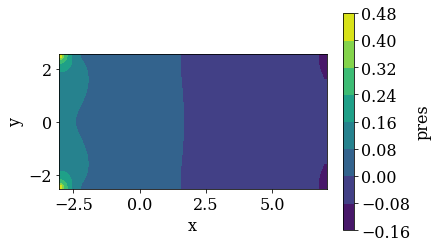

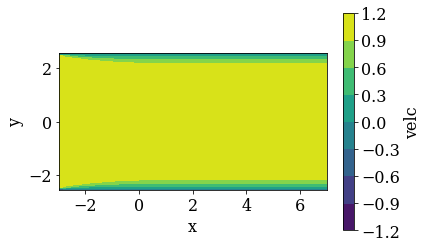

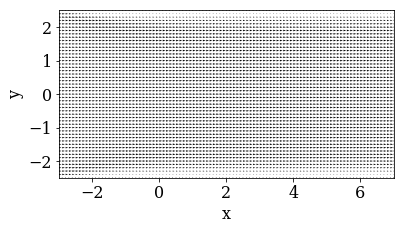

------------ Time = 3.00999999999998 ---------------
Number of poisson iterations    : 160
Final poisson residual : 8.928139230057096e-10
Max, Min, U   : 1.1330162450632861, -1.0
Max, Min, V   : 0.11981354129640447, -0.11981354129644778
Max, Min, P   : 0.4253521124474404, -0.08393757054931292
Max, Min, DIV : 1.5781872961386856e-08, -1.461375789303665e-08


------------ Time = 3.0199999999999796 ---------------
Number of poisson iterations    : 160
Final poisson residual : 8.869018917487428e-10
Max, Min, U   : 1.1330468460079577, -1.0
Max, Min, V   : 0.11981609983491227, -0.11981609983962853
Max, Min, P   : 0.42534749013461215, -0.08383763390380362
Max, Min, DIV : 1.5297678586769295e-08, -1.4972065723114734e-08


------------ Time = 3.0299999999999794 ---------------
Number of poisson iterations    : 160
Final poisson residual : 8.762668471204437e-10
Max, Min, U   : 1.1330762422496814, -1.0
Max, Min, V   : 0.11981863198405364, -0.11981863198574576
Max, Min, P   : 0.42534312765414745, -0

------------ Time = 3.2699999999999743 ---------------
Number of poisson iterations    : 159
Final poisson residual : 9.526031164892991e-10
Max, Min, U   : 1.1334750931594333, -1.0
Max, Min, V   : 0.1198718018813832, -0.11987180187844611
Max, Min, P   : 0.42530871040745993, -0.08152613607487015
Max, Min, DIV : 1.7121288206634055e-08, -1.7565683538365434e-08


------------ Time = 3.279999999999974 ---------------
Number of poisson iterations    : 159
Final poisson residual : 9.309611129778451e-10
Max, Min, U   : 1.1334824917979833, -1.0
Max, Min, V   : 0.11987372975346057, -0.11987372974369964
Max, Min, P   : 0.42530991222179465, -0.08144112615341173
Max, Min, DIV : 1.4632183191460148e-08, -1.4944038957687145e-08


------------ Time = 3.289999999999974 ---------------
Number of poisson iterations    : 159
Final poisson residual : 9.271223589838152e-10
Max, Min, U   : 1.1334894732014769, -1.0
Max, Min, V   : 0.1198756380391847, -0.11987563803195664
Max, Min, P   : 0.425311303930537, -0.0

------------ Time = 3.5299999999999687 ---------------
Number of poisson iterations    : 154
Final poisson residual : 8.930976579293302e-10
Max, Min, U   : 1.133594533584974, -1.0
Max, Min, V   : 0.11991638390788904, -0.11991638390477224
Max, Min, P   : 0.4253961304155419, -0.07949352156342047
Max, Min, DIV : 1.8278746724553763e-08, -1.5227251187396873e-08


------------ Time = 3.5399999999999685 ---------------
Number of poisson iterations    : 154
Final poisson residual : 8.598528844970688e-10
Max, Min, U   : 1.1335976769004668, -1.0
Max, Min, V   : 0.11991789774277216, -0.11991789775394064
Max, Min, P   : 0.4254016027024474, -0.07942238664338659
Max, Min, DIV : 1.8999704740063628e-08, -1.5064722828569965e-08


------------ Time = 3.5499999999999683 ---------------
Number of poisson iterations    : 154
Final poisson residual : 8.468766867327179e-10
Max, Min, U   : 1.1336007443797813, -1.0
Max, Min, V   : 0.1199193981075172, -0.11991939810269178
Max, Min, P   : 0.425407214534475, -0.0

------------ Time = 3.789999999999963 ---------------
Number of poisson iterations    : 152
Final poisson residual : 8.865833362478747e-10
Max, Min, U   : 1.1338134438195082, -1.0
Max, Min, V   : 0.1199516123027273, -0.11995161230295831
Max, Min, P   : 0.42557979979449423, -0.07779376386055228
Max, Min, DIV : 1.4715582467850208e-08, -1.4781423932075377e-08


------------ Time = 3.799999999999963 ---------------
Number of poisson iterations    : 152
Final poisson residual : 8.80603871833483e-10
Max, Min, U   : 1.133857748837373, -1.0
Max, Min, V   : 0.11995280605858359, -0.11995280605720776
Max, Min, P   : 0.4255884155275551, -0.07773417426415721
Max, Min, DIV : 1.635693649190001e-08, -1.3921157117693927e-08


------------ Time = 3.8099999999999627 ---------------
Number of poisson iterations    : 152
Final poisson residual : 8.780736927151891e-10
Max, Min, U   : 1.1339009246765481, -1.0
Max, Min, V   : 0.11995398890819282, -0.11995398890875933
Max, Min, P   : 0.42559713408633754, -0.07

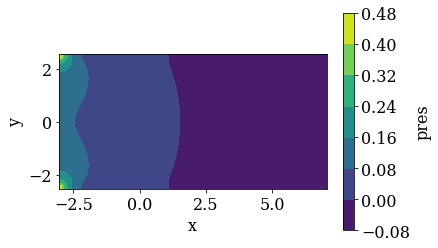

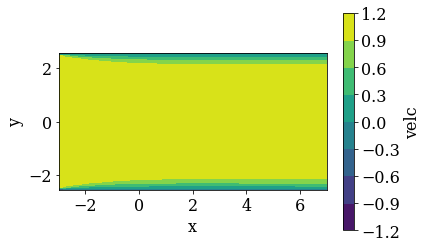

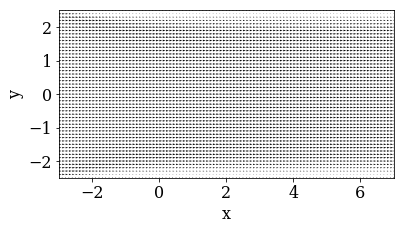

------------ Time = 4.009999999999959 ---------------
Number of poisson iterations    : 151
Final poisson residual : 8.633113915050832e-10
Max, Min, U   : 1.134559469914904, -1.0
Max, Min, V   : 0.11997554525481315, -0.11997554525616136
Max, Min, P   : 0.4257912946795013, -0.0765691849613445
Max, Min, DIV : 1.5900620094634176e-08, -1.414487614190274e-08


------------ Time = 4.019999999999959 ---------------
Number of poisson iterations    : 151
Final poisson residual : 8.415125461980874e-10
Max, Min, U   : 1.134584113653167, -1.0
Max, Min, V   : 0.11997652779921439, -0.11997652779773985
Max, Min, P   : 0.4258019094362997, -0.0765175794520079
Max, Min, DIV : 1.681374034098737e-08, -1.444432858651451e-08


------------ Time = 4.0299999999999585 ---------------
Number of poisson iterations    : 150
Final poisson residual : 9.730014497352746e-10
Max, Min, U   : 1.1346081659047185, -1.0
Max, Min, V   : 0.1199775017753167, -0.11997750178476209
Max, Min, P   : 0.42581259296410645, -0.0764663

------------ Time = 4.259999999999954 ---------------
Number of poisson iterations    : 145
Final poisson residual : 9.55243507036718e-10
Max, Min, U   : 1.1350825262051873, -1.0
Max, Min, V   : 0.11999781451152347, -0.11999781453251276
Max, Min, P   : 0.42607821967793136, -0.07537382482388236
Max, Min, DIV : 2.368064242050036e-08, -1.825392788919883e-08


------------ Time = 4.269999999999953 ---------------
Number of poisson iterations    : 146
Final poisson residual : 9.838512325283234e-10
Max, Min, U   : 1.1351005599907393, -1.0
Max, Min, V   : 0.11999861324620074, -0.1199986132540629
Max, Min, P   : 0.42609055983214816, -0.0753299337136555
Max, Min, DIV : 1.8558812748961998e-08, -1.650258792783982e-08


------------ Time = 4.279999999999953 ---------------
Number of poisson iterations    : 148
Final poisson residual : 9.105175301546652e-10
Max, Min, U   : 1.1351182705192668, -1.0
Max, Min, V   : 0.11999940516187568, -0.119999405171493
Max, Min, P   : 0.4261029349821217, -0.0752862

------------ Time = 4.539999999999948 ---------------
Number of poisson iterations    : 151
Final poisson residual : 8.660378120072842e-10
Max, Min, U   : 1.1354831193834796, -1.0
Max, Min, V   : 0.1200178827608487, -0.12001788276623311
Max, Min, P   : 0.4264428448449722, -0.07424765102587173
Max, Min, DIV : 1.4244292788475818e-08, -1.601929678490821e-08


------------ Time = 4.549999999999947 ---------------
Number of poisson iterations    : 151
Final poisson residual : 8.54227178282948e-10
Max, Min, U   : 1.1354936876422066, -1.0
Max, Min, V   : 0.120018518669289, -0.12001851866371674
Max, Min, P   : 0.426456530167783, -0.07421121621558277
Max, Min, DIV : 1.580044003079116e-08, -1.5161924181439357e-08


------------ Time = 4.559999999999947 ---------------
Number of poisson iterations    : 151
Final poisson residual : 8.437528955491219e-10
Max, Min, U   : 1.1355040015711566, -1.0
Max, Min, V   : 0.12001914963685048, -0.12001914964855936
Max, Min, P   : 0.42647025487687484, -0.0741750

------------ Time = 4.8299999999999415 ---------------
Number of poisson iterations    : 103
Final poisson residual : 9.208149789569522e-10
Max, Min, U   : 1.1363427378793431, -1.0
Max, Min, V   : 0.12003445077661326, -0.12003445078058823
Max, Min, P   : 0.4268536905284555, -0.07328783792716467
Max, Min, DIV : 1.8359645286708526e-08, -1.893765788022611e-08


------------ Time = 4.839999999999941 ---------------
Number of poisson iterations    : 103
Final poisson residual : 9.735854384644741e-10
Max, Min, U   : 1.1363853233009058, -1.0
Max, Min, V   : 0.12003495889902148, -0.12003495889894258
Max, Min, P   : 0.42686831038633566, -0.07325816707477893
Max, Min, DIV : 1.9330435972395033e-08, -1.8931758695981717e-08


------------ Time = 4.849999999999941 ---------------
Number of poisson iterations    : 104
Final poisson residual : 8.835361524106529e-10
Max, Min, U   : 1.1364272471384391, -1.0
Max, Min, V   : 0.1200354629260699, -0.12003546292701658
Max, Min, P   : 0.4268829778069386, -0.0

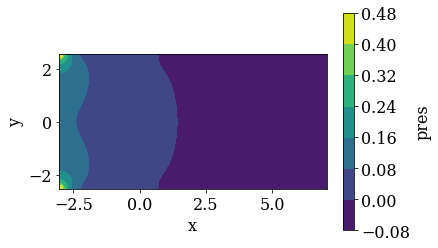

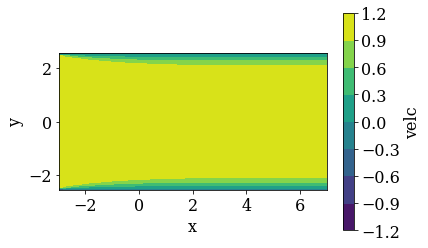

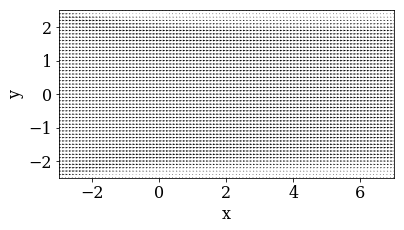

------------ Time = 5.009999999999938 ---------------
Number of poisson iterations    : 104
Final poisson residual : 9.070431655776601e-10
Max, Min, U   : 1.1370807600457273, -1.0
Max, Min, V   : 0.12004302966960315, -0.12004302966896108
Max, Min, P   : 0.42711978111435106, -0.07278534188996562
Max, Min, DIV : 2.0424628999161573e-08, -1.4167458982990329e-08


------------ Time = 5.019999999999937 ---------------
Number of poisson iterations    : 150
Final poisson residual : 8.686655936789537e-10
Max, Min, U   : 1.1371187975826342, -1.0
Max, Min, V   : 0.12004347236772699, -0.12004347236506241
Max, Min, P   : 0.4271363932358382, -0.07276183810247745
Max, Min, DIV : 1.6731454763330156e-08, -1.5415859342532423e-08


------------ Time = 5.029999999999937 ---------------
Number of poisson iterations    : 105
Final poisson residual : 9.698680124947495e-10
Max, Min, U   : 1.1371562923388499, -1.0
Max, Min, V   : 0.12004391299476858, -0.12004391300662208
Max, Min, P   : 0.4271497420269875, -0.

------------ Time = 5.259999999999932 ---------------
Number of poisson iterations    : 150
Final poisson residual : 9.73692009164087e-10
Max, Min, U   : 1.1378940769648018, -1.0
Max, Min, V   : 0.1200531797500003, -0.1200531797542674
Max, Min, P   : 0.427500452630941, -0.07219743151965324
Max, Min, DIV : 1.7455050807524408e-08, -1.5591236550080434e-08


------------ Time = 5.269999999999932 ---------------
Number of poisson iterations    : 150
Final poisson residual : 9.745274244932739e-10
Max, Min, U   : 1.1379253575403951, -1.0
Max, Min, V   : 0.12005354831296142, -0.1200535483071157
Max, Min, P   : 0.4275158101542504, -0.07217630057585037
Max, Min, DIV : 1.7167839407028485e-08, -1.673785586867038e-08


------------ Time = 5.279999999999932 ---------------
Number of poisson iterations    : 150
Final poisson residual : 9.557745474298788e-10
Max, Min, U   : 1.1379562734269428, -1.0
Max, Min, V   : 0.12005391406855509, -0.12005391406348458
Max, Min, P   : 0.4275311779694633, -0.0721553

------------ Time = 5.489999999999927 ---------------
Number of poisson iterations    : 150
Final poisson residual : 8.455794314452827e-10
Max, Min, U   : 1.1385199978060312, -1.0
Max, Min, V   : 0.12006101718838087, -0.12006101720954597
Max, Min, P   : 0.42785562540786193, -0.07175568221039348
Max, Min, DIV : 1.5588084481630432e-08, -1.5052316060248927e-08


------------ Time = 5.499999999999927 ---------------
Number of poisson iterations    : 150
Final poisson residual : 8.462400540539237e-10
Max, Min, U   : 1.1385429624356571, -1.0
Max, Min, V   : 0.1200613295463639, -0.12006132956279435
Max, Min, P   : 0.4278711340332697, -0.07173851425338493
Max, Min, DIV : 1.594657238895847e-08, -1.6017869808315766e-08


------------ Time = 5.509999999999927 ---------------
Number of poisson iterations    : 150
Final poisson residual : 8.549417827326369e-10
Max, Min, U   : 1.1385655890809188, -1.0
Max, Min, V   : 0.12006163964975411, -0.12006163964798997
Max, Min, P   : 0.42788664602820864, -0.0

------------ Time = 5.7199999999999225 ---------------
Number of poisson iterations    : 149
Final poisson residual : 9.101558228873876e-10
Max, Min, U   : 1.139092132402473, -1.0
Max, Min, V   : 0.12006767121292655, -0.12006767126249218
Max, Min, P   : 0.4282127412958929, -0.07140145285897077
Max, Min, DIV : 1.7667161865408954e-08, -1.9963685708029866e-08


------------ Time = 5.729999999999922 ---------------
Number of poisson iterations    : 149
Final poisson residual : 9.541394061514082e-10
Max, Min, U   : 1.1391492955434905, -1.0
Max, Min, V   : 0.12006793683245989, -0.12006793687876555
Max, Min, P   : 0.4282282645833538, -0.07138793019134701
Max, Min, DIV : 1.8096017843916012e-08, -1.5481315285281738e-08


------------ Time = 5.739999999999922 ---------------
Number of poisson iterations    : 149
Final poisson residual : 9.02081334687057e-10
Max, Min, U   : 1.1392058569915275, -1.0
Max, Min, V   : 0.12006820064571205, -0.12006820066986201
Max, Min, P   : 0.4282437887592185, -0.07

------------ Time = 5.989999999999917 ---------------
Number of poisson iterations    : 148
Final poisson residual : 9.128223128914403e-10
Max, Min, U   : 1.1405487450825509, -1.0
Max, Min, V   : 0.12007423616196522, -0.12007423615593944
Max, Min, P   : 0.4286306729608582, -0.07108841675399766
Max, Min, DIV : 1.670599170458531e-08, -1.632319992714293e-08


------------ Time = 5.9999999999999165 ---------------
Number of poisson iterations    : 148
Final poisson residual : 9.129057672045957e-10
Max, Min, U   : 1.140596942796473, -1.0
Max, Min, V   : 0.12007445667952955, -0.12007445666262077
Max, Min, P   : 0.4286460802135622, -0.07107884901581947
Max, Min, DIV : 1.7117599247773452e-08, -1.6420026623109596e-08




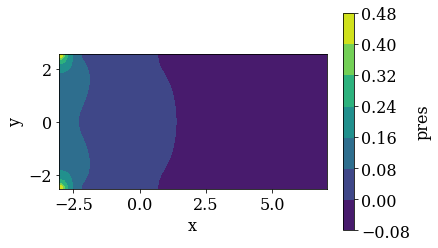

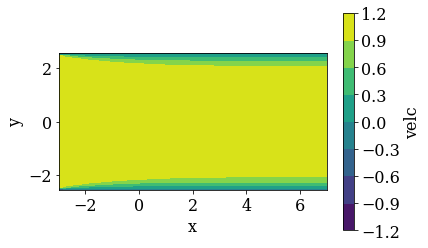

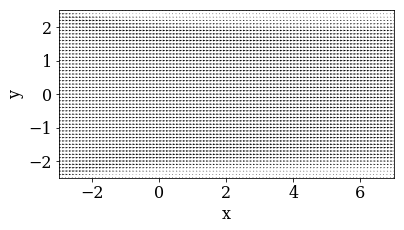

------------ Time = 6.009999999999916 ---------------
Number of poisson iterations    : 148
Final poisson residual : 9.202306622394328e-10
Max, Min, U   : 1.1406446825199368, -1.0
Max, Min, V   : 0.12007467578611739, -0.12007467578496275
Max, Min, P   : 0.42866148070995663, -0.07106942178385146
Max, Min, DIV : 1.6091906714262028e-08, -1.6446568523731386e-08


------------ Time = 6.019999999999916 ---------------
Number of poisson iterations    : 148
Final poisson residual : 9.007042142599227e-10
Max, Min, U   : 1.1406919702631266, -1.0
Max, Min, V   : 0.12007489327592005, -0.12007489326235134
Max, Min, P   : 0.4286768732100905, -0.07106013771539271
Max, Min, DIV : 1.711238799967374e-08, -1.5998914398157593e-08


------------ Time = 6.029999999999916 ---------------
Number of poisson iterations    : 148
Final poisson residual : 9.045778562227466e-10
Max, Min, U   : 1.1407392467264341, -1.0
Max, Min, V   : 0.12007510943173753, -0.1200751094456737
Max, Min, P   : 0.4286922596005772, -0.07

------------ Time = 6.30999999999991 ---------------
Number of poisson iterations    : 141
Final poisson residual : 9.316320198814627e-10
Max, Min, U   : 1.1420098380127648, -1.0
Max, Min, V   : 0.12008060294494903, -0.12008060294912543
Max, Min, P   : 0.429119485850143, -0.0708509675553772
Max, Min, DIV : 1.4203150322522617e-08, -2.103540704123663e-08


------------ Time = 6.31999999999991 ---------------
Number of poisson iterations    : 141
Final poisson residual : 9.208274063630672e-10
Max, Min, U   : 1.1420530411658478, -1.0
Max, Min, V   : 0.12008078072356299, -0.12008078075098502
Max, Min, P   : 0.4291345947160878, -0.07084579465259494
Max, Min, DIV : 1.380704019865453e-08, -1.8708898642111338e-08


------------ Time = 6.3299999999999095 ---------------
Number of poisson iterations    : 141
Final poisson residual : 9.34986054725686e-10
Max, Min, U   : 1.1420958542855624, -1.0
Max, Min, V   : 0.12008095746987132, -0.12008095750542452
Max, Min, P   : 0.4291496915085554, -0.0708407

------------ Time = 6.569999999999904 ---------------
Number of poisson iterations    : 141
Final poisson residual : 8.844151511931741e-10
Max, Min, U   : 1.1430111959486904, -1.0
Max, Min, V   : 0.12008486625496635, -0.12008486623957047
Max, Min, P   : 0.4295081770774081, -0.07076004143397721
Max, Min, DIV : 1.43280731463441e-08, -1.89122650266077e-08


------------ Time = 6.579999999999904 ---------------
Number of poisson iterations    : 141
Final poisson residual : 8.81777186294359e-10
Max, Min, U   : 1.1430473076467962, -1.0
Max, Min, V   : 0.12008501613073377, -0.12008501613142762
Max, Min, P   : 0.42952294144982717, -0.07075835765649474
Max, Min, DIV : 1.4100035744014916e-08, -2.1342369932106364e-08


------------ Time = 6.589999999999904 ---------------
Number of poisson iterations    : 141
Final poisson residual : 8.987643165558759e-10
Max, Min, U   : 1.1430841819429791, -1.0
Max, Min, V   : 0.12008516513149003, -0.12008516514512627
Max, Min, P   : 0.42953769078623244, -0.0707

------------ Time = 6.829999999999899 ---------------
Number of poisson iterations    : 141
Final poisson residual : 9.467384686643105e-10
Max, Min, U   : 1.1438658151484138, -1.0
Max, Min, V   : 0.12008846489036168, -0.12008846491630784
Max, Min, P   : 0.4298869652340214, -0.07076093533301675
Max, Min, DIV : 1.5223167310930708e-08, -1.8343881724378064e-08


------------ Time = 6.839999999999899 ---------------
Number of poisson iterations    : 141
Final poisson residual : 9.590964315623543e-10
Max, Min, U   : 1.1439257039695934, -1.0
Max, Min, V   : 0.12008859165516998, -0.12008859165549936
Max, Min, P   : 0.42990131064679105, -0.07076287028926989
Max, Min, DIV : 1.5776505830900067e-08, -1.842506104979269e-08


------------ Time = 6.849999999999898 ---------------
Number of poisson iterations    : 141
Final poisson residual : 9.360589186265902e-10
Max, Min, U   : 1.143988110834158, -1.0
Max, Min, V   : 0.12008871757740827, -0.12008871761497436
Max, Min, P   : 0.42991563866737026, -0.0

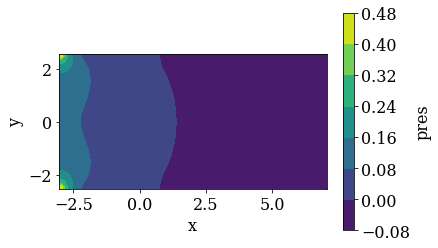

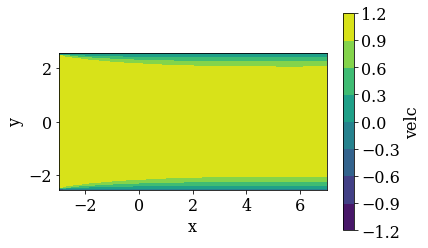

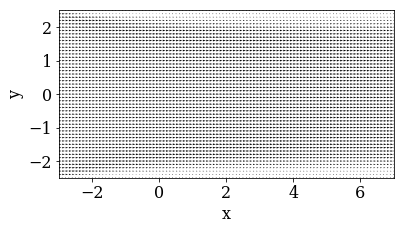

------------ Time = 7.009999999999895 ---------------
Number of poisson iterations    : 142
Final poisson residual : 8.374997327016688e-10
Max, Min, U   : 1.1449662587067055, -1.0
Max, Min, V   : 0.12009062668165574, -0.12009062667513713
Max, Min, P   : 0.4301424294948961, -0.07081867049040817
Max, Min, DIV : 1.4317378393968738e-08, -1.4983325781481316e-08


------------ Time = 7.019999999999895 ---------------
Number of poisson iterations    : 142
Final poisson residual : 8.928445374514305e-10
Max, Min, U   : 1.1450254386091174, -1.0
Max, Min, V   : 0.12009073969323282, -0.12009073968212262
Max, Min, P   : 0.43015645370125044, -0.07082335730010456
Max, Min, DIV : 3.370723109137608e-08, -3.024884557417673e-08


------------ Time = 7.0299999999998946 ---------------
Number of poisson iterations    : 142
Final poisson residual : 8.621361243738127e-10
Max, Min, U   : 1.145084233389911, -1.0
Max, Min, V   : 0.12009085198452886, -0.12009085200903029
Max, Min, P   : 0.43017045321068464, -0.0

------------ Time = 7.289999999999889 ---------------
Number of poisson iterations    : 144
Final poisson residual : 8.935649810708122e-10
Max, Min, U   : 1.1465408426268255, -1.0
Max, Min, V   : 0.1200935364752872, -0.12009353647077298
Max, Min, P   : 0.4305274244181043, -0.07101549851003107
Max, Min, DIV : 2.3023230215964835e-08, -1.9537560675200738e-08


------------ Time = 7.299999999999889 ---------------
Number of poisson iterations    : 144
Final poisson residual : 8.893000072715608e-10
Max, Min, U   : 1.1465933229861192, -1.0
Max, Min, V   : 0.12009363123798669, -0.12009363123088541
Max, Min, P   : 0.43054087374434713, -0.07102528637079376
Max, Min, DIV : 1.7385786644109197e-08, -1.7864090207098116e-08


------------ Time = 7.309999999999889 ---------------
Number of poisson iterations    : 144
Final poisson residual : 9.230038963701638e-10
Max, Min, U   : 1.1466454738373981, -1.0
Max, Min, V   : 0.12009372545758122, -0.12009372544347138
Max, Min, P   : 0.4305543008594738, -0.0

------------ Time = 7.559999999999883 ---------------
Number of poisson iterations    : 148
Final poisson residual : 8.584909235638175e-10
Max, Min, U   : 1.147910477313832, -1.0
Max, Min, V   : 0.12009589992917025, -0.12009589996587823
Max, Min, P   : 0.4308827064777883, -0.07136264010046232
Max, Min, DIV : 1.9069428211851425e-08, -2.0756364231544477e-08


------------ Time = 7.569999999999883 ---------------
Number of poisson iterations    : 148
Final poisson residual : 8.363782318098234e-10
Max, Min, U   : 1.1479576524924473, -1.0
Max, Min, V   : 0.12009598014797424, -0.12009598015224494
Max, Min, P   : 0.4308955377640435, -0.07137923409899845
Max, Min, DIV : 1.369976951326457e-08, -1.4375617578277211e-08


------------ Time = 7.579999999999883 ---------------
Number of poisson iterations    : 148
Final poisson residual : 8.698836360488625e-10
Max, Min, U   : 1.1480070759824852, -1.0
Max, Min, V   : 0.12009605989760243, -0.12009605985162752
Max, Min, P   : 0.4309083508822425, -0.071

------------ Time = 7.789999999999878 ---------------
Number of poisson iterations    : 121
Final poisson residual : 8.983060789995126e-10
Max, Min, U   : 1.1489750269678136, -1.0
Max, Min, V   : 0.12009762621966344, -0.1200976262063497
Max, Min, P   : 0.43117153516239914, -0.07183103811094109
Max, Min, DIV : 1.5212619011717443e-08, -1.681719297152995e-08


------------ Time = 7.799999999999878 ---------------
Number of poisson iterations    : 133
Final poisson residual : 9.367974087173286e-10
Max, Min, U   : 1.1490178079277962, -1.0
Max, Min, V   : 0.12009769583819734, -0.12009769581785176
Max, Min, P   : 0.4311841678235485, -0.07185555541561157
Max, Min, DIV : 2.069867210963139e-08, -1.5750819849780218e-08


------------ Time = 7.809999999999878 ---------------
Number of poisson iterations    : 121
Final poisson residual : 9.629942946975396e-10
Max, Min, U   : 1.1490627881675148, -1.0
Max, Min, V   : 0.12009776521291508, -0.12009776516575839
Max, Min, P   : 0.4311959945649664, -0.071

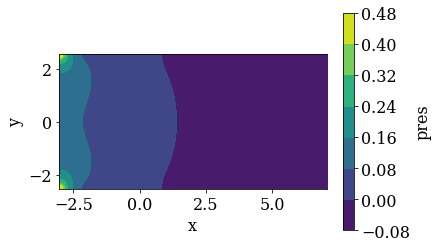

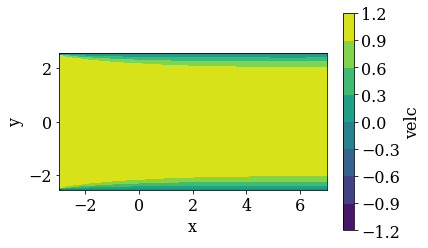

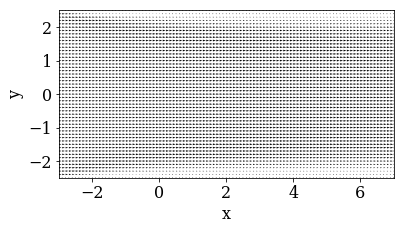

------------ Time = 8.009999999999874 ---------------
Number of poisson iterations    : 133
Final poisson residual : 9.810774410309084e-10
Max, Min, U   : 1.149906916254296, -1.0
Max, Min, V   : 0.12009906593480484, -0.12009906594648652
Max, Min, P   : 0.4314347455307552, -0.07249261174947094
Max, Min, DIV : 1.76063841283991e-08, -1.6698657387403948e-08


------------ Time = 8.019999999999873 ---------------
Number of poisson iterations    : 150
Final poisson residual : 8.58428007241906e-10
Max, Min, U   : 1.1499461035100091, -1.0
Max, Min, V   : 0.12009912661130448, -0.12009912658734985
Max, Min, P   : 0.4314474657193782, -0.07252792847087546
Max, Min, DIV : 1.7365912763356306e-08, -1.6572759553579175e-08


------------ Time = 8.029999999999873 ---------------
Number of poisson iterations    : 127
Final poisson residual : 9.613962648792455e-10
Max, Min, U   : 1.1499850138207077, -1.0
Max, Min, V   : 0.12009918749961314, -0.12009918748623657
Max, Min, P   : 0.4314582822366968, -0.07256

------------ Time = 8.249999999999869 ---------------
Number of poisson iterations    : 133
Final poisson residual : 9.569606620392037e-10
Max, Min, U   : 1.1513713224192825, -1.0
Max, Min, V   : 0.12010043357036734, -0.12010043353975075
Max, Min, P   : 0.4317067657547464, -0.07353923412501744
Max, Min, DIV : 1.581620118207283e-08, -2.021786960071381e-08


------------ Time = 8.259999999999868 ---------------
Number of poisson iterations    : 131
Final poisson residual : 9.908594710499206e-10
Max, Min, U   : 1.1514323811761717, -1.0
Max, Min, V   : 0.12010048639112834, -0.12010048640744635
Max, Min, P   : 0.43171859883263175, -0.07359055987624911
Max, Min, DIV : 1.6919897483091972e-08, -1.593295585744503e-08


------------ Time = 8.269999999999868 ---------------
Number of poisson iterations    : 143
Final poisson residual : 9.831343761583397e-10
Max, Min, U   : 1.151493355486231, -1.0
Max, Min, V   : 0.12010053878676105, -0.12010053879145179
Max, Min, P   : 0.43172848966777994, -0.073

------------ Time = 8.479999999999864 ---------------
Number of poisson iterations    : 133
Final poisson residual : 9.846999047555615e-10
Max, Min, U   : 1.1527537214675994, -1.0
Max, Min, V   : 0.1201015726711372, -0.12010157267569274
Max, Min, P   : 0.43195131612121157, -0.07491935485515125
Max, Min, DIV : 1.8507825376434806e-08, -1.7119143890659272e-08


------------ Time = 8.489999999999863 ---------------
Number of poisson iterations    : 143
Final poisson residual : 8.951409966866855e-10
Max, Min, U   : 1.1528127946934117, -1.0
Max, Min, V   : 0.12010161844466356, -0.12010161846997186
Max, Min, P   : 0.43196048413170895, -0.07498849428805536
Max, Min, DIV : 1.8318337402511986e-08, -1.7084388903576553e-08


------------ Time = 8.499999999999863 ---------------
Number of poisson iterations    : 134
Final poisson residual : 9.406588140245664e-10
Max, Min, U   : 1.1528716414188656, -1.0
Max, Min, V   : 0.12010166438313755, -0.12010166440063734
Max, Min, P   : 0.43197179049265116, -0

------------ Time = 8.769999999999857 ---------------
Number of poisson iterations    : 143
Final poisson residual : 8.855179645525093e-10
Max, Min, U   : 1.1543929031438986, -1.0
Max, Min, V   : 0.12010280380611724, -0.12010280379969468
Max, Min, P   : 0.43223229940469615, -0.07713873053788596
Max, Min, DIV : 1.9438998188903156e-08, -1.52922621440843e-08


------------ Time = 8.779999999999857 ---------------
Number of poisson iterations    : 135
Final poisson residual : 9.170524893534235e-10
Max, Min, U   : 1.1544473768071835, -1.0
Max, Min, V   : 0.12010284297447181, -0.1201028429827605
Max, Min, P   : 0.43224273055120643, -0.07722077149657182
Max, Min, DIV : 1.6602382305747065e-08, -1.5438137851431222e-08


------------ Time = 8.789999999999857 ---------------
Number of poisson iterations    : 144
Final poisson residual : 9.651250322241453e-10
Max, Min, U   : 1.1545016531014916, -1.0
Max, Min, V   : 0.12010288123138657, -0.12010288127507653
Max, Min, P   : 0.4322506475704306, -0.07

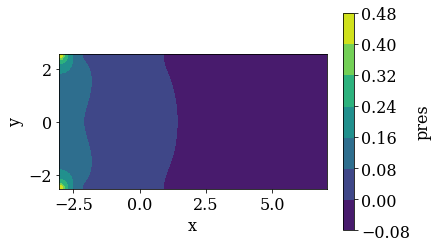

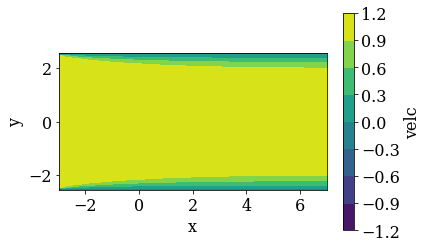

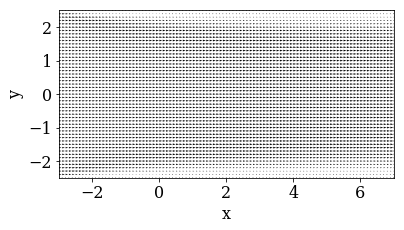

------------ Time = 9.009999999999852 ---------------
Number of poisson iterations    : 144
Final poisson residual : 8.824663049552694e-10
Max, Min, U   : 1.1560322799992657, -1.0
Max, Min, V   : 0.12010367553568248, -0.12010367555412028
Max, Min, P   : 0.43244501766742305, -0.0789194851436326
Max, Min, DIV : 1.6232764438184333e-08, -1.597536274274003e-08


------------ Time = 9.019999999999852 ---------------
Number of poisson iterations    : 129
Final poisson residual : 8.952299945453372e-10
Max, Min, U   : 1.1560994849308477, -1.0
Max, Min, V   : 0.12010370946204321, -0.12010370946060368
Max, Min, P   : 0.43245451222115766, -0.07897750435937152
Max, Min, DIV : 1.7003327953957204e-08, -1.3556429642042067e-08


------------ Time = 9.029999999999852 ---------------
Number of poisson iterations    : 143
Final poisson residual : 9.545182258075878e-10
Max, Min, U   : 1.1561659961844026, -1.0
Max, Min, V   : 0.12010374270905894, -0.12010374272436794
Max, Min, P   : 0.43246202429475417, -0.

------------ Time = 9.249999999999847 ---------------
Number of poisson iterations    : 125
Final poisson residual : 9.63973765220025e-10
Max, Min, U   : 1.157788300373396, -1.0
Max, Min, V   : 0.12010443359916999, -0.12010443363146678
Max, Min, P   : 0.4326428528568098, -0.07974060265330704
Max, Min, DIV : 2.0101151992912847e-08, -2.00877108766373e-08


------------ Time = 9.259999999999847 ---------------
Number of poisson iterations    : 122
Final poisson residual : 7.99951635464166e-10
Max, Min, U   : 1.1578608050582673, -1.0
Max, Min, V   : 0.1201044630404412, -0.12010446300502935
Max, Min, P   : 0.4326511599093219, -0.07974333552753549
Max, Min, DIV : 1.6473322324295214e-08, -2.1979656220083577e-08


------------ Time = 9.269999999999847 ---------------
Number of poisson iterations    : 148
Final poisson residual : 8.520040295543755e-10
Max, Min, U   : 1.1579321493518864, -1.0
Max, Min, V   : 0.12010449243856128, -0.1201044924372615
Max, Min, P   : 0.4326590934716067, -0.07974377

------------ Time = 9.479999999999842 ---------------
Number of poisson iterations    : 154
Final poisson residual : 9.591115503034186e-10
Max, Min, U   : 1.1596833305385332, -1.0
Max, Min, V   : 0.12010506891889042, -0.12010506889741117
Max, Min, P   : 0.4328239757486351, -0.07922172586173264
Max, Min, DIV : 1.4989935161191514e-08, -1.822819045010915e-08


------------ Time = 9.489999999999842 ---------------
Number of poisson iterations    : 155
Final poisson residual : 7.752700952761166e-10
Max, Min, U   : 1.159766207250149, -1.0
Max, Min, V   : 0.1201050946233285, -0.12010509461799104
Max, Min, P   : 0.43283181060608855, -0.07917352258261005
Max, Min, DIV : 1.657981916385401e-08, -1.4544126649557176e-08


------------ Time = 9.499999999999842 ---------------
Number of poisson iterations    : 155
Final poisson residual : 8.147970641810906e-10
Max, Min, U   : 1.1598469439406818, -1.0
Max, Min, V   : 0.12010512015363475, -0.12010512017644974
Max, Min, P   : 0.4328395946635269, -0.0791

------------ Time = 9.729999999999837 ---------------
Number of poisson iterations    : 165
Final poisson residual : 9.353488137735299e-10
Max, Min, U   : 1.1611725372793542, -1.0
Max, Min, V   : 0.12010567350271209, -0.12010567353563562
Max, Min, P   : 0.43301976720115853, -0.07748416112802307
Max, Min, DIV : 1.8531753302047926e-08, -1.6341722419710436e-08


------------ Time = 9.739999999999837 ---------------
Number of poisson iterations    : 162
Final poisson residual : 9.642133661817947e-10
Max, Min, U   : 1.1612107044406383, -1.0
Max, Min, V   : 0.12010569637196575, -0.12010569637511774
Max, Min, P   : 0.43302748132268465, -0.07739861662847877
Max, Min, DIV : 1.9218180644965666e-08, -2.3195788068086642e-08


------------ Time = 9.749999999999837 ---------------
Number of poisson iterations    : 162
Final poisson residual : 9.921516492106516e-10
Max, Min, U   : 1.161247624852436, -1.0
Max, Min, V   : 0.12010571874209332, -0.12010571878335538
Max, Min, P   : 0.433035459556623, -0.0

------------ Time = 9.999999999999831 ---------------
Number of poisson iterations    : 144
Final poisson residual : 9.913387365547479e-10
Max, Min, U   : 1.1619203785605254, -1.0
Max, Min, V   : 0.12010624157492095, -0.12010624156597179
Max, Min, P   : 0.43323501947647897, -0.07528066948472417
Max, Min, DIV : 1.8102755457855002e-08, -1.7251708811505395e-08




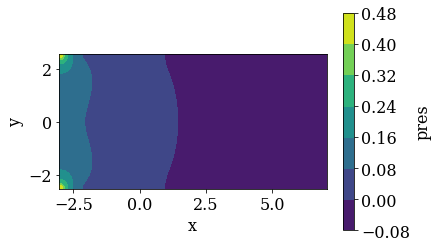

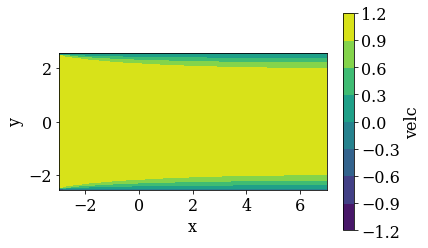

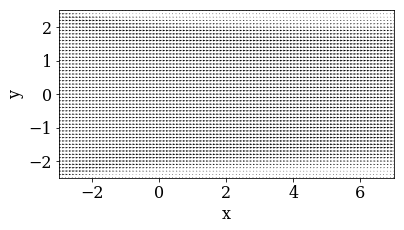

In [4]:
ins_vars = ['velc', 'hvar', 'divv', 'pres']

while scalars.variable['time'] <= scalars.variable['tmax']:
    
    flowx.ins_advance(gridc, gridx, gridy, scalars, ins_vars, time_stepping = 'ab2',
                                                              poisson_solve = 'serial_cg',
                                                              maxiter = 2000)
    
    # Display stats
    if scalars.variable['nstep'] % 1 == 0:
        flowx.io.display_stats(scalars)  
        
    if scalars.variable['nstep'] % 100 == 0:
        flowx.io.plot_contour(gridc, 'pres')
        flowx.io.plot_contour(gridx, 'velc')
        flowx.io.plot_vector(gridx,gridy,'velc')
              
    scalars.advance()

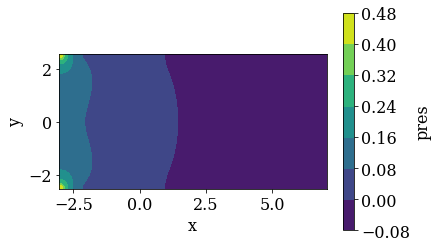

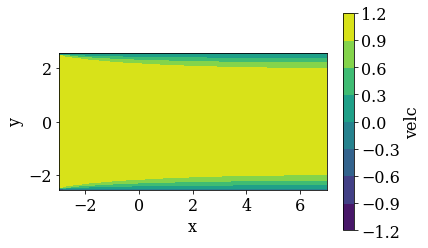

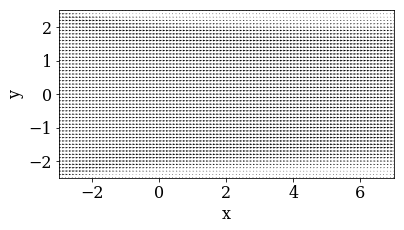

In [5]:
flowx.io.plot_contour(gridc, 'pres')
flowx.io.plot_contour(gridx, 'velc')
flowx.io.plot_vector(gridx,gridy,'velc')